In [74]:
from preprocessing import *
from word_swap import *
import torch
from transformers import AutoTokenizer,AutoModel,pipeline


# Obtaining and preprocessing a corpus

For simplicity of demonstration, we use the Brown Corpus, conveniently available from NLTK. The Brown Corpus is a collection of English-language text, totaling roughly one million words, compiled from works published in the United States in 1961. The corpus is divided into 15 genres, such as news, editorial, and fiction; for this demonstration, we use the entire corpus. The files are further divided into sentences and tagged with part-of-speech (POS) tags. For more information on the Brown Corpus, see the [NLTK documentation](http://www.nltk.org/book/ch02.html#brown-corpus).

The following code imports the Brown Corpus preprocesses each sentence. The preprocessing:
- Removes punctuation
- Converts all words to lowercase

Additionally, this step removes sentences containing proper nouns or non-alphabetical characters.

In [2]:
# def extract_natural_sequences(tagged_words,sequence_len):
#     """Extracts natural sequences of specified length from a list of pos-tagged words. 

#     Additionally preprocesses the words by removing punctuation and lowercasing, and builds
#     up a dictionary of words to their POS tags.

#     Args:
#         tagged_words: a list of tuples (word,tag)
#         sequence_len: the length of the sequences to extract

#     Returns:    
#         a list of natural sequences of the specified length

#     """

#     natural_sequences = []
#     word_list = []
#     counter = 0

#     for word,tag in tagged_words:
#         w = word.replace("-","").replace("''","").lower().translate(translator)
#         if w.isalpha() and w != '' and not (tag in excluded_pos):
#             word_list.append(w)
#             counter += 1
#             if counter == sequence_len:
#                 natural_sequences.append(word_list[-sequence_len:])
#                 counter = 0
#         else:
#             counter = 0
    
#     return natural_sequences

In [3]:
# def process_sentence(s,single_token_words=False,tokenizer=None, excluded_token_ids=[]):
#     """Preprocess a sentence by removing punctuation and lowercasing.
    
#     Additionally filters sentences that contain proper nouns or 
#     non-alphabetic characters.
    
#     Args:
#         s: a list of strings (e.g., ["I", "like", "apples."])
        
#     Returns:
#         A list of words (e.g., ["i", "like", "apples"]) or None if
#         the sentence should be filtered out.
#     """

#     assert not (single_token_words and tokenizer is None), "Must provide a tokenizer if single_token_words is True"

#     tags = [tag for (word,tag) in nltk.pos_tag(s)]
#     # check for proper nouns
    
#     if any(tag in excluded_pos for tag in tags):
#         return None
#     else:
#         # separate hypenated words and remove quotes
#         new = " ".join(s).replace("-"," ").replace("''","").lower()
#         # remove punctuation
#         split = new.translate(translator).split()
#         split = [s for s in split if s != "''"]
#         # check if all words are alphabetic
#         if "".join(split).isalpha():
#             if single_token_words:
#                 # only add sentences that are exactly sentence_len tokens long
#                 tokenized = [x for x in tokenizer.encode(" ".join(split)) if x not in excluded_token_ids]
#                 if len(tokenized) == len(split):
#                     return split
#                 else:
#                     return None
#             return split
#         else:
#             return None

In [4]:
# class Corpus:
#     def __init__(self,nltk_corpus,single_token_words=False,tokenizer=None,excluded_token_ids=[]):
#         self.corpus = nltk_corpus
#         self.single_token_words = single_token_words
#         self.tokenizer = tokenizer
#         self.excluded_token_ids = excluded_token_ids
#         self.all_preprocessed_sentences = []

#         assert not (single_token_words and tokenizer is None), "If single_token_words is True, a tokenizer must be provided."
#         if tokenizer:
#             assert tokenizer.add_prefix_space, "The tokenizer must have add_prefix_space set to True."

#         for s in tqdm(nltk_corpus.sents()):
#             new = process_sentence(s,single_token_words,tokenizer,excluded_token_ids)
#             if new is not None:
#                 self.all_preprocessed_sentences.append(new)
#         self.word_lookup = {}
#         self.pos_dict = {}
#         self.tagged_words_no_punct = []
#         for w,t in self.corpus.tagged_words():
#             wp = w.translate(translator)
#             if wp.isalpha():
#                 self.tagged_words_no_punct.append((wp,t))
#         for word,tag in tqdm(self.tagged_words_no_punct):
#             w = word.replace("-","").replace("''","").lower().translate(translator)
#             if w.isalpha() and w != '' and not (tag in excluded_pos):
#                 if tag in self.pos_dict:
#                     self.pos_dict[tag].append(w)
#                 else:
#                     self.pos_dict[tag] = [w]
#                 self.word_lookup[w] = tag


#         if single_token_words:
#             temp_pos_dict = {'OTHER':[]}
#             for key,value in pos_dict.items():
#                 new = []
#                 for v in set(value):
#                     token = [t for t in tokenizer.encode(v) if t not in excluded_token_ids]
#                     if len(token) == 1:
#                         new.append(v)

#                 if len(set(new)) < 5:
#                     temp_pos_dict['OTHER'].extend(set(new))
#                 else:
#                     temp_pos_dict[key] = new

#             temp_word_lookup = {}
#             for pos in temp_pos_dict:
#                 for word in temp_pos_dict[pos]:
#                     temp_word_lookup[word] = pos
#             self.pos_dict = temp_pos_dict
#             self.word_lookup = temp_word_lookup

#     def get_sentences_of_length(self, length):
#         return [s for s in self.all_preprocessed_sentences if len(s) == length]

#     def get_natural_sequences_of_length(self, length):
#         natural_sequences = extract_natural_sequences(
#             tagged_words = self.corpus.tagged_words(),
#             sequence_len = length
#         )
#         return natural_sequences

#     def get_noun_phrases_of_length(self, length):
#         noun_phrases = extract_noun_phrases(
#             self.all_preprocessed_sentences,
#             phrase_length = length)
#         return noun_phrases

In [5]:
from nltk.corpus import brown

corpus = Corpus(brown)
# all_preprocessed_sentences = []
# for s in tqdm(nltk.corpus.brown.sents()):
#     new = process_sentence(s)
#     if new is not None:
#         all_preprocessed_sentences.append(new)

  0%|          | 0/57340 [00:00<?, ?it/s]

  0%|          | 0/1004244 [00:00<?, ?it/s]

We can filter the preprocessed sentences to retain only those having particular lengths:

In [6]:
selected_sentences = corpus.get_sentences_of_length(12)

For example, we inspect the first five 12-word sentences:

In [7]:
[" ".join(selected_sentences[i]) for i in range(5)]

['under committee rules it went automatically to a subcommittee for one week',
 'nothing has been done yet to take advantage of the enabling legislation',
 'how can a man with any degree of common decency charge this',
 'he then launched into what the issues should be in the campaign',
 'there is a tangible feeling in the air of revulsion toward politics']

We can also similarly extract and preprocess sequences of natural text (not necessarilly delimited by sentence boundaries):

In [8]:
natural_sequences = corpus.get_natural_sequences_of_length(12)
# natural_sequences,word_lookup,pos_dict = extract_natural_sequences(
#     tagged_words = nltk.corpus.brown.tagged_words(),
#     sequence_len = 40
# )

In [9]:
for i,word in enumerate(natural_sequences[0]):
    print(f"{i} {word}:{corpus.word_lookup[word]}")

0 the:AT
1 jury:NN
2 further:RBR
3 said:VBD
4 in:IN
5 termend:NN
6 presentments:NNS
7 that:CS
8 the:AT
9 city:NN-TL
10 executive:NN
11 committee:NN-TL


The Corpus object also has a dictionary that allows one to lookup words having a given POS-tag, e.g., adjectives (`JJ`):

In [10]:
corpus.pos_dict["JJ"][:10]

['recent',
 'overall',
 'possible',
 'hardfought',
 'relative',
 'such',
 'widespread',
 'outmoded',
 'inadequate',
 'ambiguous']

Lastly, one can similarly extract noun phrases from the corpus. For convenience, we repurpose the preprocessed sentences obtained above.

In [11]:
noun_phrases = corpus.get_noun_phrases_of_length(8)

# noun_phrases = extract_noun_phrases(
#     sum(selected_sentences.values(), []),
#     phrase_length = 8)

In [12]:
[" ".join(noun_phrases[i]) for i in range(5)]

['the entire two and a half mile length',
 'the same three month period toll road bonds',
 'the only or even the most appropriate conceptuality',
 'the intellectual social political and economic attitudes institutions',
 'the true color texture complexity range intensity pulse']

# Word swap procedure

Now that the corpus has been preprocessed, we can create sequences and perform the word swap procedure. The nature of the input sequences and the method of selecting the swapped word vary with the analysis at hand, but the word swap procedure remains the same. Specifically:

- To assess overall integration, we use sequences of natural text(e.g., of 40 words in length), and make swaps using randomly selected words having the same POS-tag.
- To assess structure yoking, we create sequences of five structures of prespecified length (e.g., 12-word sentences), and make swaps from a pool of words selected based on the difference in the embeddings betwen the original and candidate words.
- We also consider making swaps using probable (or improbable) words, as determined (independently) by BERT.

We found that sentence-final words yielded slightly more tokens on average than words in other positions. To account for this in the structure yoking analysis, we tokenize all candidate sentences and used only those that are comprised entirely of single-token words.

One can instantiate a tokenizer as follows:


In [40]:
from transformers import AutoTokenizer
model = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(
    model, add_special_token=False,add_prefix_space=True)

The Corpus also needs to be reinitialized with the new tokenizer:

In [14]:
corpus = Corpus(brown,single_token_words=True,tokenizer=tokenizer)

  0%|          | 0/57340 [00:00<?, ?it/s]

  0%|          | 0/1004244 [00:00<?, ?it/s]

GPT-2 does not have any structure-delimiting tokens. Other models (e.g., BERT) do have such tokens, which need to be excluded.

In [17]:
yoking_sequences = create_yoking_sequences(
    sentences = corpus.get_sentences_of_length(12),
    tokenizer = tokenizer,
    excluded_token_ids = []
)

In [18]:
" ".join(yoking_sequences[0][:24])

'and to develop a discriminating audience for good drama and sensitive performance they are not true because scientists or prophets say they are true'

In [59]:
class WordSwap:
    def __init__(self,excluded_token_ids=[]):
        self.original_sequences = []
        self.swapped = []
        self.excluded_token_ids = excluded_token_ids 

        self.ok = True

    def __call__(self,sequences):
        pass

class RandomWordSwap(WordSwap):
    def __init__(self,excluded_token_ids=[]):
        super().__init__(excluded_token_ids=excluded_token_ids)

    def __repr__(self):
        return "Word swaps using random choice from word list"

    def __call__(self,sequences):
        n_sequences = len(sequences)

        for sequence_num,s in tqdm(enumerate(sequences)):
            other = sequences[np.random.choice(range(n_sequences),1)[0]]
            swapped_sequences = []
            for i,word in enumerate(s):
                temp = s.copy()
                to_swap = random.choice(word_list)
                while to_swap == word:
                    to_swap = random.choice(word_list)
                temp[i] = to_swap
                swapped_sequences.append(temp)

            self.swapped.append(swapped_sequences)
            self.original_sequences.append(s)

class RandomPosWordSwap(WordSwap):
    def __init__(self,word_lookup,pos_dict,tokenizer,excluded_token_ids = []):
        super().__init__(excluded_token_ids=excluded_token_ids)
        self.word_lookup = word_lookup
        self.pos_dict = pos_dict
        self.tokenizer = tokenizer
        self.word_list = []
        for w in list(word_lookup.keys()):
            tokens = [t for t in tokenizer.encode(w) if t not in excluded_token_ids]
            if len(tokens) == 1:
                self.word_list.append(w)
    
    def __repr__(self):
        return "Word swaps using random choice from same POS"

    def __call__(self,sequences):
        for sequence_num,s in tqdm(enumerate(sequences)):
            swapped_sequences = []
            for i,word in enumerate(s):
                temp = s.copy()
                current_pos = self.word_lookup[word]
                if current_pos not in self.pos_dict:
                    print("Warning: ",current_pos," not in pos_dict")
                    print(word)
                    to_swap = random.choice(self.word_list)
                else:
                    to_swap = random.choice(self.pos_dict[current_pos])
                try_count = 0
                token = self.tokenizer.encode(to_swap)
                token = [t for t in token if t not in self.excluded_token_ids]
                while (to_swap == word) or len(token)>1:
                    if (try_count < 10) and (current_pos in self.pos_dict):
                        to_swap = random.choice(self.pos_dict[current_pos]) # some rare pos tags may not have many words
                        token = self.tokenizer.encode(to_swap)
                        token = [t for t in token if t not in self.excluded_token_ids]
                        try_count += 1
                        # print(try_count,current_pos)
                        if try_count == 10:
                            print(f"Warning: {current_pos} has few words (current word: {word})")
                            break
                    else:
                        to_swap = random.choice(self.word_list) # just pick randomly in that case
                        break
                temp[i] = to_swap
                swapped_sequences.append(temp)
            self.swapped.append(swapped_sequences)
            self.original_sequences.append(s)



pos_swapper = RandomPosWordSwap(corpus.word_lookup,corpus.pos_dict,tokenizer)




After calling them on an appropriate list of sequences, the word swap objects have attributes `swapped` and `original_sequences` that contain the swapped and original sequences, respectively. `swapped` is a list of lists: `swapped[i][j]` if the `i`th sequence with the `j`th word swapped. Indices are zero-indexed.

In [33]:
i = 0
j = 5
print("Original: " + " ".join(pos_swapper.original_sequences[i][:10])),
print(f"Swapped at {j}: " + " ".join(pos_swapper.swapped[i][j][:10])) 
print(f"Swapped at {j+1}: " + " ".join(pos_swapper.swapped[i][j+1][:10])) 

Original: and to develop a discriminating audience for good drama and
Swapped at 5: and to develop a discriminating drafting for good drama and
Swapped at 6: and to develop a discriminating audience to good drama and


Let's also see how the other swap procedures work:

In [70]:
def create_candidate_embeddings(tokens,embedding_function):
    with torch.no_grad():
        candidate_embeddings = embedding_function(torch.stack(tokens)).squeeze()
    print("Candidate embeddings created of shape: ",candidate_embeddings.shape)
    return candidate_embeddings

def filter_word_list(word_list,tokenizer,excluded_token_ids = []):
    wlist = [w for w in word_list if (w.isalpha())]
    out = []
    tokens = []
    for word in tqdm(wlist):
        current = tokenizer.encode(word)
        current = torch.tensor([q for q in current if q not in excluded_token_ids])
        if len(current) == 1:
            out.append(word)
            tokens.append(current)
    return out,tokens

word_list = list(corpus.word_lookup.keys())
word_list,tokens = filter_word_list(word_list, tokenizer,[])
from transformers import AutoModel, AutoTokenizer
model = AutoModel.from_pretrained('gpt2')
tokenizer = AutoTokenizer.from_pretrained(
    'gpt2', add_special_token=False,add_prefix_space=True)

def create_distribution(word,candidate_embeddings,mean,half_width,embedding_function, excluded_token_ids = [], size=10,spacing=.001):
    out = None
    with torch.no_grad():
        token = tokenizer.encode(word)
        token = torch.tensor([t for t in token if t not in excluded_token_ids])

        target = embedding_function(token).mean(0,keepdim=True)

        assert target.ndim == 2
        diff = torch.abs(candidate_embeddings - target).mean(-1)
        for c in torch.arange(mean-half_width,mean+half_width,spacing):
            indices = torch.nonzero((diff > c) & (diff < c+spacing),as_tuple=True)[0]
            ridx = np.random.choice(len(indices),size=size,replace=True)
            if out is None:
                out = indices[ridx]
            else:
                out = torch.cat([out,indices[ridx]])
        return out

class DistributionWordSwap(WordSwap):
    def __init__(self,word_list,embedding_function,sampling_params,excluded_token_ids = []):
        super().__init__(excluded_token_ids=excluded_token_ids)
        self.word_list = word_list
        self.embedding_function = embedding_function
        self.sampling_params = sampling_params

        self.candidate_embeddings = create_candidate_embeddings(tokens,embedding_function)
        assert candidate_embeddings.shape[0] == len(word_list), "Word list and candidate embeddings don't match"


    def __repr__(self):
        return "Word swaps with embedding differences sampled from a uniform distribution"

    def __call__(self,sequences):
        potential_swaps = {}
        all_diffs = {}
        for sequence_num,s in tqdm(enumerate(sequences)):
            swapped_sequences = []
            for i,word in enumerate(s):
                if self.ok:
                    temp = s.copy()
                    try:
                        distribution = create_distribution(word,
                                                            candidate_embeddings,
                                                            **self.sampling_params,
                                                            embedding_function = self.embedding_function,
                                                            excluded_token_ids = self.excluded_token_ids)

                        selected_idx = np.random.choice(distribution)
                        temp[i] = word_list[selected_idx]
                    except:
                        print("Using random word sub for: ",word)
                        temp[i] = random.choice(word_list)
                    swapped_sequences.append(temp)
            self.swapped.append(swapped_sequences)
            self.original_sequences.append(s)




# candidate_embeddings = create_candidate_embeddings(tokens,model.base_model.wte.forward)
sampling_params = {'mean':.125,'half_width':.003,'spacing':.001,'size':100}
distribution_swapper = DistributionWordSwap(word_list,
                                            model.base_model.wte.forward,
                                            sampling_params,
                                            excluded_token_ids = [])


  0%|          | 0/14999 [00:00<?, ?it/s]

Candidate embeddings created of shape:  torch.Size([14999, 768])


In [71]:
distribution_swapper(yoking_sequences[:10])

0it [00:00, ?it/s]

In [73]:
print("Original: " + " ".join(distribution_swapper.original_sequences[i][:10])),
print(f"Swapped at {j}: " + " ".join(distribution_swapper.swapped[i][j][:10])) 
print(f"Swapped at {j+1}: " + " ".join(distribution_swapper.swapped[i][j+1][:10])) 

Original: and to develop a discriminating audience for good drama and
Swapped at 5: and to develop a discriminating integration for good drama and
Swapped at 6: and to develop a discriminating audience whence good drama and


In [84]:
class ProbableWordSwap(WordSwap):
    def __init__(self,unmasker,idx_low = 0,idx_high = 100,sentence_len = None,excluded_token_ids = []):
        super().__init__(excluded_token_ids)
        self.unmasker = unmasker
        self.idx_low = idx_low
        self.idx_high = idx_high
        self.sentence_len = sentence_len


    def __repr__(self):
        return "Word swaps sampled from a probable pool of words (determined using a user-specified unmasker)"

    def __call__(self,sequences):
        for sequence_num,s in tqdm(enumerate(sequences)):
            try:
                swapped_sequences = []
                for i,word in enumerate(s):
                    temp = s.copy()
                    temp[i] = '[MASK]'
                    if self.sentence_len:
                        current_sentence_start = (i//self.sentence_len)*self.sentence_len
                        current_sentence_end = current_sentence_start + self.sentence_len
                        current_sentence = " ".join(temp[current_sentence_start:current_sentence_end])
                    else:
                        current_sentence = " ".join(temp)
                    
                    potential_swaps = np.array([x["token_str"] for x in self.unmasker(current_sentence) if ((x["token_str"] != word) and x["token_str"].isalpha())])
                    n_potential_swaps = len(potential_swaps)
                    temp[i] = potential_swaps[np.random.randint(low=self.idx_low,high=min(self.idx_high,n_potential_swaps),size=1)[0]] 
                    swapped_sequences.append(temp)
            except Exception as e:
                self.ok = False
                print(e)
                continue

            if self.ok:
                self.swapped.append(swapped_sequences)
                self.original_sequences.append(s)

unmasker = pipeline('fill-mask',model = 'bert-large-uncased-whole-word-masking',top_k=1000,device='cpu')
probable_swapper = ProbableWordSwap(unmasker,idx_low = 0,idx_high = 5,sentence_len = 12,excluded_token_ids = [])
probable_swapper(yoking_sequences[:10])


Some weights of the model checkpoint at bert-large-uncased-whole-word-masking were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


0it [00:00, ?it/s]

In [85]:
print("Original: " + " ".join(probable_swapper.original_sequences[i][:10])),
print(f"Swapped at {j}: " + " ".join(probable_swapper.swapped[i][j][:10])) 
print(f"Swapped at {j+1}: " + " ".join(probable_swapper.swapped[i][j+1][:10])) 

Original: and to develop a discriminating audience for good drama and
Swapped at 5: and to develop a discriminating taste for good drama and
Swapped at 6: and to develop a discriminating audience of good drama and


# Obtaining activations

In [96]:
import pandas as pd


def preproc_stim(text,tokenizer,excluded_token_ids = []):
    df = pd.DataFrame({'word': text})
    df['tokens'] = [tokenizer.encode(row["word"]) for i,row in df.iterrows()]
    df['tokens'] = [[t for t in row['tokens'] if t not in excluded_token_ids] for i,row in df.iterrows()]
    df['n_tokens_in_word'] = [len(i) for i in df['tokens']]
    df['decoded'] = [tokenizer.convert_ids_to_tokens(row['tokens']) for i,row in df.iterrows()]
    

    return(df)

In [97]:
preproc_stim(probable_swapper.original_sequences[0],tokenizer=tokenizer)

,word,tokens,n_tokens_in_word,decoded
0,and,[290],1,[Ġand]
1,to,[284],1,[Ġto]
2,develop,[1205],1,[Ġdevelop]
3,a,[257],1,[Ġa]
4,discriminating,[48212],1,[Ġdiscriminating]
5,audience,[5386],1,[Ġaudience]
6,for,[329],1,[Ġfor]
7,good,[922],1,[Ġgood]
8,drama,[10512],1,[Ġdrama]
9,and,[290],1,[Ġand]


In [101]:
model.config

GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "transformers_version": "4.28.1",
  "use_cache": true,
  "vocab_size": 50257
}

In [112]:
def aggregate_tokens(df,activations):
    assert torch.any(torch.isnan(activations)) == False
    assert df['n_tokens_in_word'].sum() == activations.shape[1]
    out = []
    counter = 0
    for i,row in df.iterrows():
        new = activations[:,counter:counter+row['n_tokens_in_word'],:].mean(dim=1)
        out.append(new)
        counter += row['n_tokens_in_word']
    return torch.stack(out,dim=1)

def get_activations(
    dfs,
    model,
    wte_only = True if model.config.model_type == "gpt2" else False,
    device='cuda'):

    if model.config.model_type != "gpt2" and wte_only:
        raise Exception("wte_only is only supported for gpt2 models")

    model.to(device)
    model.eval()
    results = []

    for df in dfs:
        df["word_index"] = np.arange(len(df))
        with torch.no_grad():
            inpt = torch.tensor(list(itertools.chain.from_iterable(df['tokens']))).reshape(1,-1)
            inpt = inpt.to(model.device)
            out = model(inpt, output_hidden_states=True)
            out = torch.stack(out.hidden_states)
            if wte_only:
                out[0] = model.base_model.wte.forward(inpt)[None]
            out = out.cpu()

        out = aggregate_tokens(df,out.squeeze())
        results.append(out)
    results = torch.stack(results,dim=1)
    return results

In [116]:
def calculate_difference_tensor(swapped_seqs,original_seqs,tokenizer,model,device='cuda'):
    out = None
    n = 0
    for zz,(swapped,original) in tqdm(enumerate(zip(swapped_seqs,original_seqs))):
        try:
            swapped_dfs = []
            for s in swapped:
                df = preproc_stim(s,tokenizer=tokenizer)
                swapped_dfs.append(df)
            original_df = preproc_stim(original,tokenizer=tokenizer)
            swapped_activations = get_activations(swapped_dfs,model=model,device=device)
            original_activations = get_activations([original_df],model=model,device=device)

            if (swapped_activations is not None) and (original_activations is not None):
                difference = torch.abs(swapped_activations - original_activations)
                if out is None:
                    out = difference
                else:
                    out += difference
                n += 1
        except ValueError:
            print("Error: ",zz,original)
            continue
    print("Finished calculating difference tensor for ",n," sequences")
    return out/n

In [118]:
swapped_seqs = probable_swapper.swapped
original_seqs = probable_swapper.original_sequences
test = calculate_difference_tensor(swapped_seqs,original_seqs,tokenizer,model,device='cpu')

0it [00:00, ?it/s]

Finished calculating difference tensor for  10  sequences


In [119]:
test.shape

torch.Size([13, 60, 60, 768])

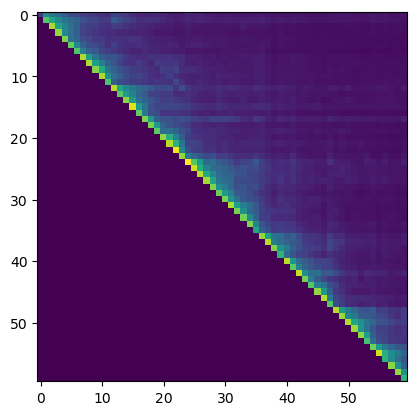

In [120]:
import matplotlib.pyplot as plt
plt.imshow(test.mean(-1)[11])